In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def kernal(X0,X,tau):
    return np.exp(np.sum((X-X0)**2,axis=1)/(-2*tau*tau))

In [4]:
def local(X0,X,y,tau):
    X0=np.r_[1,X0]
    X=np.c_[np.ones(len(X)),X]
    xw=X.T*kernal(X0,X,tau)
    beta=np.linalg.pinv(xw @ X) @ xw @ y
    return X0 @ beta

In [7]:
n=1000
X=np.linspace(-3,3,num=n)
print("data set of 10 samples:",X[1:10])

y=np.log(np.abs(X**2-1)+.5)
print("fitting curve",y[1:10])

X+=np.random.normal(scale=.1,size=n)
print("jitter",X[1:10])

domin=np.linspace(-3,3,num=300)
print("doimn range:",domin[1:10])

data set of 10 samples: [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
fitting curve [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
jitter [-2.91538676 -2.85194534 -2.9498361  -2.99193695 -2.77545863 -3.17213921
 -2.88944511 -3.14664553 -2.90602004]
doimn range: [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [8]:
def plot_lwr(tau):
    prediction=[local(X0,X,y,tau) for X0 in domin]
    plt.scatter(X,y,color='blue',alpha=.3,s=20)
    plt.plot(domin,prediction,color='red',linewidth=3)
    plt.show()

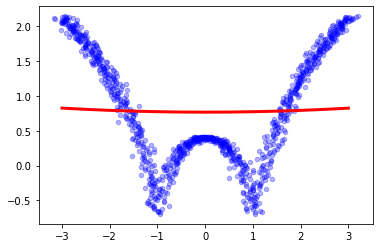

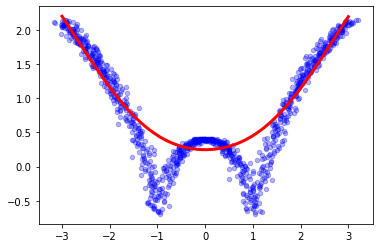

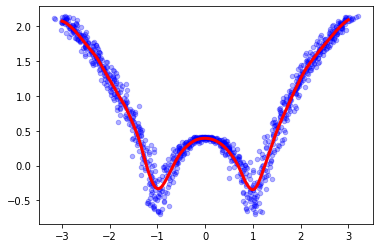

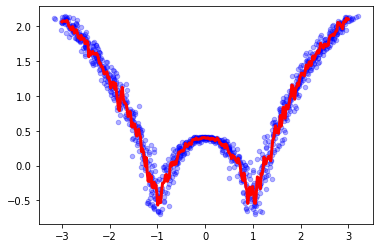

In [11]:
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)